# Laboratorio 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

En este laboratorio utilizaremos los mismos datos de diabetes vistos en la clase

In [2]:
diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.concat([diabetes_X, diabetes_Y], axis=1)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
diabetes_Y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## Pregunta 1

(1 pto)

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?
* ¿Crees que es necesario escalar o transformar los datos antes de comenzar el modelamiento?

__Respuesta:__

* Se normalizo la norma del vecor; probablemente, en un origen cada sexo era representado con una distincion binaria, como 01 y 1 o 0 y 1.
* target
* A priori nos e podria saber; porque no lo comprobamos?

In [5]:
diabetes.apply(np.linalg.norm)

age          1.000000
sex          1.000000
bmi          1.000000
bp           1.000000
s1           1.000000
s2           1.000000
s3           1.000000
s4           1.000000
s5           1.000000
s6           1.000000
target    3584.818126
dtype: float64

__Respuesta:__

* Como vemos, ya estan normalizados los datos. Esto nos favorece a la hora de estandarizar el algoritmo respecto al formato con el que vamos a trabajar. En estricto rigor, muchos de estos modelos aditen varios tipos de transformaciones a los datos iniciales, y la normalizacion en una campana es solamente uno de las muchas formas; en general, distintos metodos pueden requerir distintas funciones, pero lo tradicional es siempre mantener inputs en [-1, 1].

## Pregunta 2

(1 pto)

Realiza dos regresiones lineales con todas las _features_, el primer caso incluyendo intercepto y el segundo sin intercepto. Luego obtén la predicción para así calcular el error cuadrático medio y coeficiente de determinación de cada uno de ellos.

In [6]:
regr_with_incerpet = linear_model.LinearRegression(fit_intercept=True)
regr_with_incerpet.fit(diabetes_X, diabetes_Y)

LinearRegression()

In [7]:
diabetes_y_pred_with_intercept = regr_with_incerpet.predict(diabetes_X)

In [8]:
# Coeficientes
print(f"Coefficients: \n", regr_with_incerpet.coef_, "\n")
# Intercepto
print(f"Intercept: \n", regr_with_incerpet.intercept_, "\n")
# Error cuadrático medio
print(f"Mean squared error:", mean_squared_error(diabetes_Y, diabetes_y_pred_with_intercept), "\n")
# Coeficiente de determinación
print(f"Coefficient of determination:",  r2_score(diabetes_Y, diabetes_y_pred_with_intercept), "\n")

Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639] 

Intercept: 
 152.1334841628965 

Mean squared error: 2859.6903987680657 

Coefficient of determination: 0.5177494254132934 



In [9]:
display(diabetes_Y)
display(diabetes_y_pred_with_intercept)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241, 106.34908972,  73.89417947, 118.85378669,
       158.81033076, 213.58408893,  97.07853583,  95.1016223 ,
       115.06673301, 164.67605023, 103.07517946, 177.17236996,
       211.75953205, 182.84424343, 147.99987605, 124.01702527,
       120.33094632,  85.80377894, 113.11286302, 252.44934852,
       165.48821056, 147.72187623,  97.12824075, 179.09342974,
       129.05497324, 184.78138552, 158.71515746,  69.47588393,
       261.50255826, 112.81897436,  78.37194762,  87.66624129,
       207.92460213, 157.87686037, 240.84370686, 136.93372685,
       153.48187659,  74.15703284, 145.63105805,  77.8280105 ,
       221.0786645 , 125.22224022, 142.60147066, 109.4926324 ,
        73.14037106, 189.87368742, 157.93636782, 169.55816531,
       134.18186217, 157.72356219, 139.1077439 ,  72.73252701,
       207.8289973 ,  80.10834588, 104.08562488, 134.57807971,
       114.23779529, 180.67760064,  61.12644508,  98.72

In [10]:
regr_without_incerpet = linear_model.LinearRegression(fit_intercept=False)
regr_without_incerpet.fit(diabetes_X, diabetes_Y)

LinearRegression(fit_intercept=False)

In [11]:
diabetes_y_pred_without_intercept = regr_without_incerpet.predict(diabetes_X)

In [12]:
# Coeficientes
print(f"Coefficients: \n{regr_without_incerpet.coef_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_Y, diabetes_y_pred_without_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_Y, diabetes_y_pred_without_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Mean squared error: 26004.29

Coefficient of determination: -3.39


In [13]:
display(diabetes_Y)
display(diabetes_y_pred_without_intercept)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

array([ 5.39835856e+01, -8.40611366e+01,  2.47505762e+01,  1.47844814e+01,
       -2.36736418e+01, -4.57843944e+01, -7.82393047e+01, -3.32796975e+01,
        6.67684660e+00,  6.14506048e+01, -5.50549483e+01, -5.70318619e+01,
       -3.70667512e+01,  1.25425661e+01, -4.90583047e+01,  2.50388858e+01,
        5.96260479e+01,  3.07107593e+01, -4.13360812e+00, -2.81164589e+01,
       -3.18025378e+01, -6.63297052e+01, -3.90206211e+01,  1.00315864e+02,
        1.33547264e+01, -4.41160793e+00, -5.50052434e+01,  2.69599456e+01,
       -2.30785109e+01,  3.26479014e+01,  6.58167329e+00, -8.26576002e+01,
        1.09369074e+02, -3.93145098e+01, -7.37615365e+01, -6.44672429e+01,
        5.57911180e+01,  5.74337621e+00,  8.87102227e+01, -1.51997573e+01,
        1.34839242e+00, -7.79764513e+01, -6.50242611e+00, -7.43054737e+01,
        6.89451803e+01, -2.69112439e+01, -9.53201350e+00, -4.26408518e+01,
       -7.89931131e+01,  3.77402033e+01,  5.80288365e+00,  1.74246811e+01,
       -1.79516220e+01,  

**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

__Respuesta:__
La primera aproximacion fue relativamente mala. La segunda simplemente fue mala a secas. Pero esto tal vez indica que el problema jamas fue lineal. Dentro de todo, la primera aun tiene ALGO de similitud ocn el problema original.

## Pregunta 3

(1 pto)

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [14]:
for col in diabetes_X:
    X_i = diabetes_X[[col]]
    regr_i = linear_model.LinearRegression(fit_intercept=True)
    regr_i.fit(X_i, diabetes_Y)
    diabetes_y_pred_i = regr_i.predict(X_i)
    print(f"Feature: {col}")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: {regr_i.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(diabetes_Y, diabetes_y_pred_i):.2f}")
    print(f"\tCoefficient of determination: {r2_score(diabetes_Y, diabetes_y_pred_i)}\n")

Feature: age
	Coefficients: [304.18307453]
	Intercept: 152.13348416289605
	Mean squared error: 5720.55
	Coefficient of determination: 0.03530218264671636

Feature: sex
	Coefficients: [69.71535568]
	Intercept: 152.13348416289594
	Mean squared error: 5918.89
	Coefficient of determination: 0.0018543357106460823

Feature: bmi
	Coefficients: [949.43526038]
	Intercept: 152.1334841628967
	Mean squared error: 3890.46
	Coefficient of determination: 0.3439237602253803

Feature: bp
	Coefficients: [714.7416437]
	Intercept: 152.13348416289585
	Mean squared error: 4774.10
	Coefficient of determination: 0.19490798886682947

Feature: s1
	Coefficients: [343.25445189]
	Intercept: 152.13348416289597
	Mean squared error: 5663.32
	Coefficient of determination: 0.04495353245556555

Feature: s2
	Coefficients: [281.78459335]
	Intercept: 152.1334841628959
	Mean squared error: 5750.24
	Coefficient of determination: 0.030294651136685613

Feature: s3
	Coefficients: [-639.14527932]
	Intercept: 152.13348416289566
	

**Pregunta: Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

**Respuesta:** bmi tiene tanto el menor error cuadratico como el mayor puntaje de score; es facil ver que es la feature mas adecuada para el problema.

## Ejercicio 4

(1 pto)

Con la feature escogida en el ejercicio 3 realiza el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefieras.

In [15]:
regr = linear_model.LinearRegression(fit_intercept=True).fit(diabetes_X[["bmi"]], diabetes_Y)

In [16]:
print(diabetes_X[["bmi"]].min(), diabetes_X[["bmi"]].max())

bmi   -0.090275
dtype: float64 bmi    0.170555
dtype: float64


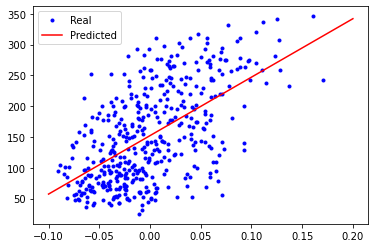

In [17]:
plt.plot(np.array(diabetes_X[["bmi"]]), np.array(diabetes_Y), "b.", label="Real")
plt.plot(np.linspace(-0.1, 0.2, 1000), np.linspace(-0.1, 0.2, 1000)*regr.coef_+regr.intercept_, "r", label="Predicted")
plt.legend()
plt.show()